## CSC 3310 Program III
### Divide and Conquer 
#### Done by Cherise  and Adrianne

In [53]:
import random
import time
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def choose_pivot(a, k):
    if k <= len(a)/ 2:
        return k-1
    else:
        return round(len(a)/2)

In [55]:
def partition( a, p_idx):
    p = a[p_idx]
    left = []
    right = []
    
    for i in range(len(a)):
        if i != p_idx:
            if a[i] < p:
                left.append(a[i])
            else:
                right.append(a[i])
    
    return left, p, right

In [56]:
def QuickSort(a, k):
    if len(a) <= 1:
        return a[0]
    p_idx = choose_pivot(a, k)
    l, p, r = partition(a, p_idx)
    newP_idx = len(l)

    if k-1 == newP_idx:
        return p
    elif k-1 < newP_idx:
        return QuickSort(l, k)
    else:
        return QuickSort(r, k- newP_idx - 1)


### Test Cases

In [57]:
test1 = [5, 1, 6, 7, 3, 4, 8]
print(QuickSort(test1, 3))

4


In [58]:
# test cases 
tests = [[10, 20, 30, 40, 60, 70, 90], [4, 8, 9, 10, 5, 3, 1, 0, 30], [5, 1, 6, 7, 3, 4, 8]
         , [10, 10, 10, 10, 10, 10, 10], [-5, -8, -9, -1, -17, -2, -10, -4, -3], 
         [14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]]
k_s = [2, 1, 7, 3, 6, 7, 1]

for x in range(len(tests)):
    print(tests[x], "the result at k = ",k_s[x],"is:",QuickSort(tests[x],k_s[x]))


[10, 20, 30, 40, 60, 70, 90] the result at k =  2 is: 20
[4, 8, 9, 10, 5, 3, 1, 0, 30] the result at k =  1 is: 0
[5, 1, 6, 7, 3, 4, 8] the result at k =  7 is: 8
[10, 10, 10, 10, 10, 10, 10] the result at k =  3 is: 10
[-5, -8, -9, -1, -17, -2, -10, -4, -3] the result at k =  6 is: -4
[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1] the result at k =  7 is: 7


In [59]:
#  for random list
r_list = [random.randint(1, 1000) for i in range(1000)]
r_list.sort()
k_rand = 500
expected = r_list[499]
print("the result for random list, expected: ", expected, "actual: ", QuickSort(r_list, k_rand))

the result for random list, expected:  496 actual:  496


#### Benchmarking the Algorithm


In [60]:
def benchmark(in_list, k):
    start = time.perf_counter()
    QuickSort(in_list, k)
    end = time.perf_counter()
    diff = end - start
    return diff

In [61]:
sizes = [10, 20, 30, 50, 100, 120, 150, 300, 500, 1000, 2000, 5000, 7000,
         10000, 20000, 50000]
k_values = [1, 4, 8, 5, 7, 10]


for size in sizes:
    random_list = [np.random.randint(0, 100, size=size)]
    for k in k_values:
        runtime = benchmark(random_list, k)
        print(f"list Size: {size}, k-value: {k}, Runtime: {runtime}" )

list Size: 10, k-value: 1, Runtime: 2.800021320581436e-06
list Size: 10, k-value: 4, Runtime: 1.999898813664913e-06
list Size: 10, k-value: 8, Runtime: 6.00004568696022e-07
list Size: 10, k-value: 5, Runtime: 5.00003807246685e-07
list Size: 10, k-value: 7, Runtime: 1.500011421740055e-06
list Size: 10, k-value: 10, Runtime: 4.00003045797348e-07
list Size: 20, k-value: 1, Runtime: 5.00003807246685e-07
list Size: 20, k-value: 4, Runtime: 5.00003807246685e-07
list Size: 20, k-value: 8, Runtime: 2.998858690261841e-07
list Size: 20, k-value: 5, Runtime: 3.00002284348011e-07
list Size: 20, k-value: 7, Runtime: 3.00002284348011e-07
list Size: 20, k-value: 10, Runtime: 3.00002284348011e-07
list Size: 30, k-value: 1, Runtime: 4.00003045797348e-07
list Size: 30, k-value: 4, Runtime: 4.00003045797348e-07
list Size: 30, k-value: 8, Runtime: 3.00002284348011e-07
list Size: 30, k-value: 5, Runtime: 3.00002284348011e-07
list Size: 30, k-value: 7, Runtime: 3.00002284348011e-07
list Size: 30, k-value: 1

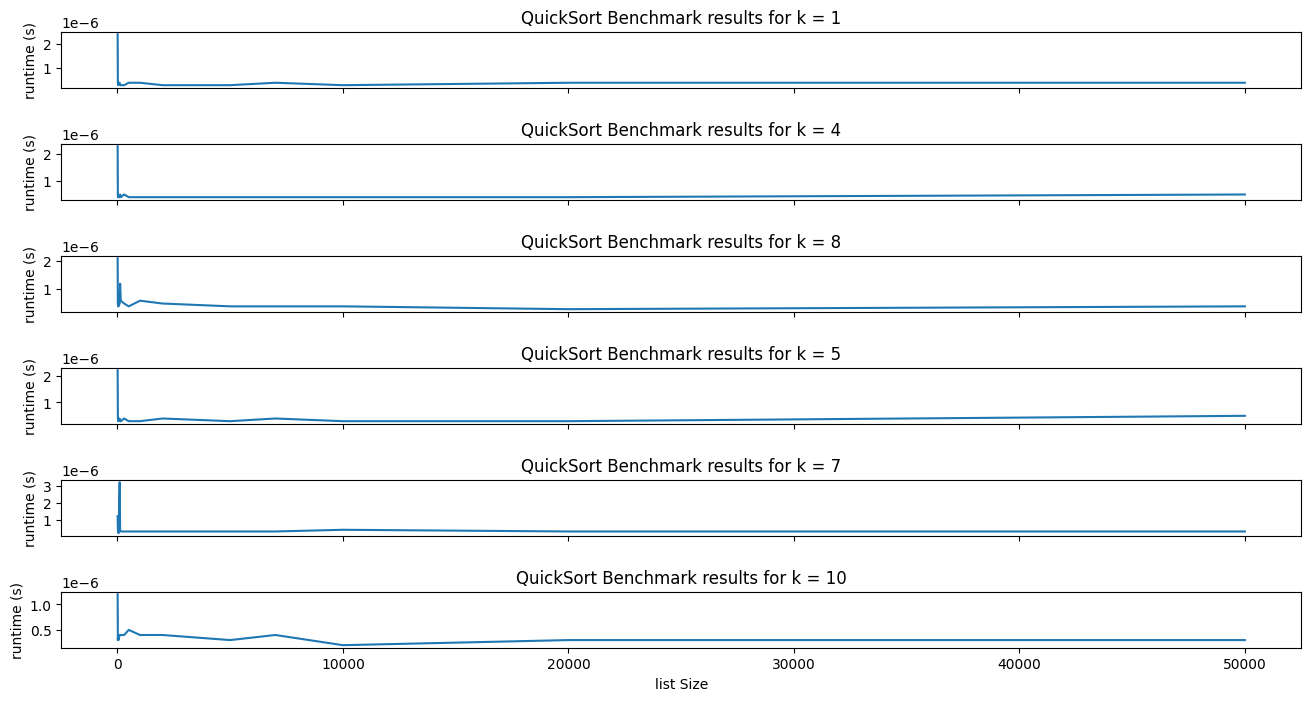

In [71]:
# plot of the bench marked results grouped into subgroups according to k
fig, axs = plt.subplots(len(k_values), 1, figsize=(16,8), sharex=True,
                        gridspec_kw={"hspace": 1})

for i in range(len(k_values)):
    times = []

    for size in sizes:
        runtime = benchmark(random_list, k_values[i])
        times.append(runtime)
    
    axs[i].plot(sizes, times, label =f"k = {k_values[i]}")
    axs[i].set_ylabel("runtime (s)")
    axs[i].set_title(f"QuickSort Benchmark results for k = {k_values[i]}")

axs[-1].set_xlabel("list Size")
plt.show()